In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.pipeline import Pipeline
from mlxtend.preprocessing import DenseTransformer

In [2]:
# the supplied CSV data files are in the data/raw directory
#load data
df = pd.read_csv('../data/raw/data3.csv')

# drop unnecessary columns
df = df.drop('Unnamed: 0', axis=1)

In [3]:
df.head()

,project_id,active,language,text,theme
0,22244,False,en,save life street dog afghanistanmore street do...,Animal Welfare
1,30154,False,en,save street dog death afghanistanmore dog thou...,Animal Welfare
2,33084,False,en,save canine human live afghanistanrabies deadl...,Animal Welfare
3,35906,False,en,green tanzaniagreen tanzania project design he...,Animal Welfare
4,41112,False,en,help nowzad reduce rabies afghanistanrabies po...,Animal Welfare


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37911 entries, 0 to 37910
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   project_id  37911 non-null  int64 
 1   active      37911 non-null  bool  
 2   language    37911 non-null  object
 3   text        37911 non-null  object
 4   theme       37911 non-null  object
dtypes: bool(1), int64(1), object(3)
memory usage: 1.2+ MB


In [5]:
df = df.loc[df['theme'].isin(['Education', 'Physical Health', 'Gender Equality', 'Economic Growth'])]

In [6]:
select_themes = list(df.theme.unique())
list_of_rows = []

for theme in select_themes:
    rows = list(np.random.choice(df[df['theme'] == theme].index.values, 2500))
    list_of_rows = list_of_rows + rows

array_of_rows = np.array(list_of_rows)
df = df.loc[array_of_rows]

In [7]:
df['theme'].value_counts()

Economic Growth    2500
Education          2500
Gender Equality    2500
Physical Health    2500
Name: theme, dtype: int64

In [8]:
X = df['text']
y = df['theme']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=47)

In [38]:
X_train

24469    help filipino mother build bright futurewomen ...
24418    send martha mercedes visit ustwo quechua staff...
24595    help victorias dream come true scholarshipin a...
30685    bizzybox lending projecttogether excite new bi...
25224    shelter victim domestic violence ugandadue ove...
                               ...                        
17941    ebola effect west africathe number child leave...
30045    sexual health among young student togothe proj...
24020    rescue empower survivor human traffickingthis ...
9329     social inclusion people disabilitiesdisability...
23395    safe house girlsgender base violence gbv one p...
Name: text, Length: 7000, dtype: object

In [10]:
count_vect = CountVectorizer()
counts = count_vect.fit_transform(X_train)
bw = pd.DataFrame(counts.toarray(),columns=count_vect.get_feature_names())

C:\Users\melis\Envs\topic_classification\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [11]:
bw

,aa,aac,aae,aaes,aai,aaid,aaina,aais,aalhad,aalhads,...,zoo,zoom,zorokoro,zorzor,zubo,zuckerberg,zuma,zyi,œhealthy,œwhile
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
vectorizer = TfidfVectorizer(strip_accents = 'ascii', stop_words='english', max_df = 0.50)
#vectorizer = TfidfVectorizer(strip_accents = 'ascii')
trsfm=vectorizer.fit_transform(X_train)
tfidf = pd.DataFrame(trsfm.toarray(),columns=vectorizer.get_feature_names())
tfidf

C:\Users\melis\Envs\topic_classification\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aa,aaa,aac,aae,aaes,aai,aaid,aaina,aais,aalhad,...,zonethis,zongo,zoo,zoom,zorokoro,zorzor,zubo,zuckerberg,zuma,zyi
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
pipe = Pipeline([
    ('tfidf', TfidfVectorizer(strip_accents = 'ascii', stop_words='english', max_df = 0.50)),
    ('dense', DenseTransformer()),
    ('NB', GaussianNB())])

pipe.fit(X_train,y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_df=0.5, stop_words='english',
                                 strip_accents='ascii')),
                ('dense', DenseTransformer()), ('NB', GaussianNB())])

In [49]:
pipe.classes_

array(['Economic Growth', 'Education', 'Gender Equality',
       'Physical Health'], dtype='<U15')

In [45]:
pipe.fit(X_train, y_train)
predicted_NB = pipe.predict(X_train)
print(classification_report(y_train, predicted_NB))

                 precision    recall  f1-score   support

Economic Growth       0.99      1.00      1.00      1739
      Education       1.00      0.99      1.00      1733
Gender Equality       1.00      1.00      1.00      1746
Physical Health       1.00      1.00      1.00      1782

       accuracy                           1.00      7000
      macro avg       1.00      1.00      1.00      7000
   weighted avg       1.00      1.00      1.00      7000



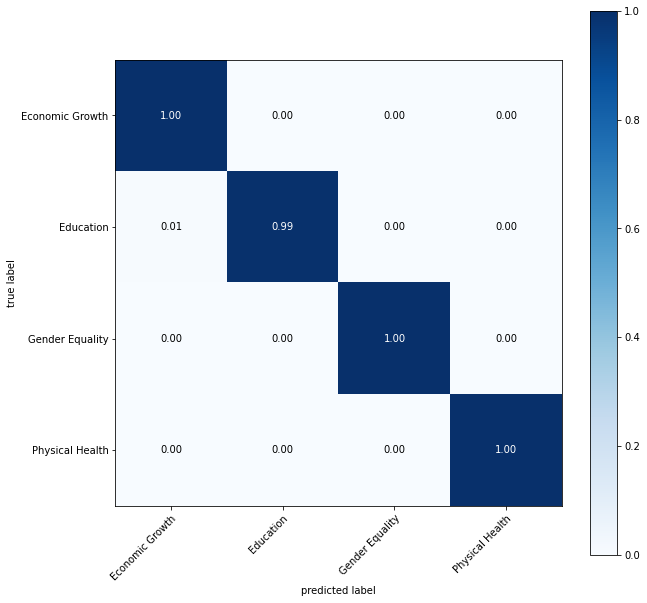

In [51]:
multiclass = confusion_matrix(y_train, predicted_NB)

class_names = pipe.classes_

fig, ax = plot_confusion_matrix(conf_mat=multiclass,
                                colorbar=True,
                                show_absolute=False,
                                show_normed=True,
                                class_names=class_names,
                                figsize = (10,10))
plt.show()

                 precision    recall  f1-score   support

Economic Growth       0.71      0.71      0.71       761
      Education       0.61      0.54      0.57       767
Gender Equality       0.64      0.69      0.67       754
Physical Health       0.68      0.71      0.70       718

       accuracy                           0.66      3000
      macro avg       0.66      0.66      0.66      3000
   weighted avg       0.66      0.66      0.66      3000



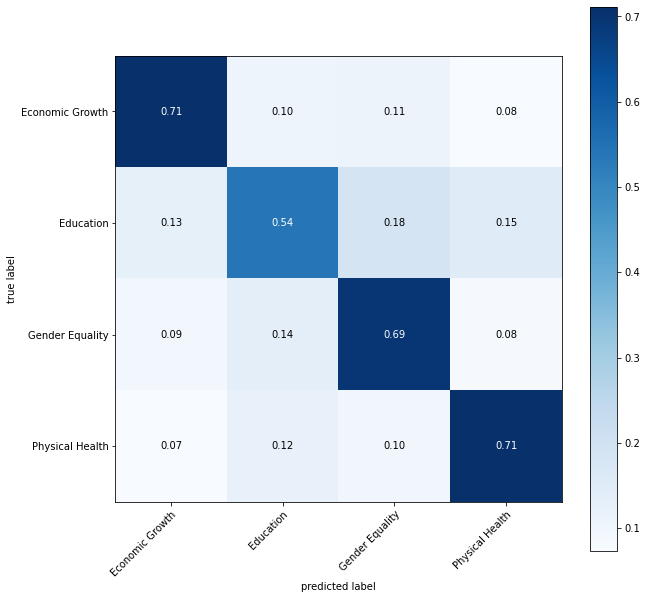

In [70]:
predicted_NB = pipe.predict(X_test)
print(classification_report(y_test, predicted_NB))

multiclass = confusion_matrix(y_test, predicted_NB)

class_names = pipe.classes_

fig, ax = plot_confusion_matrix(conf_mat=multiclass,
                                colorbar=True,
                                show_absolute=False,
                                show_normed=True,
                                class_names=class_names,
                                figsize = (10,10))
plt.show()

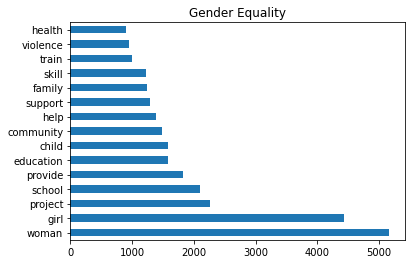

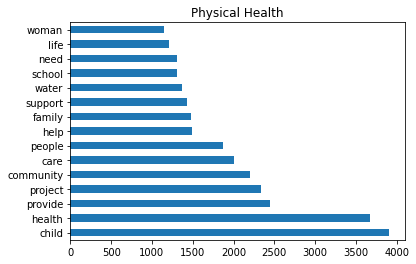

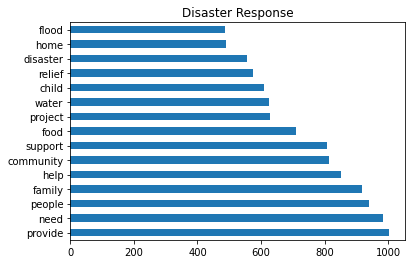

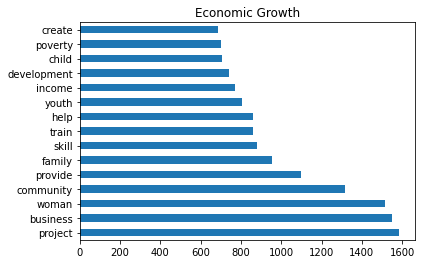

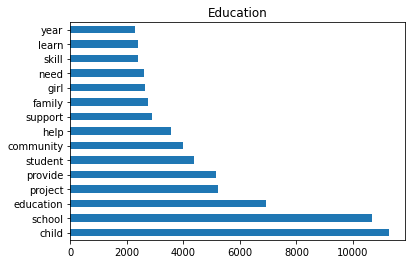

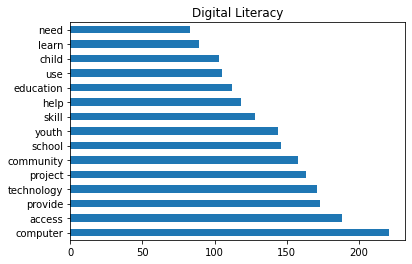

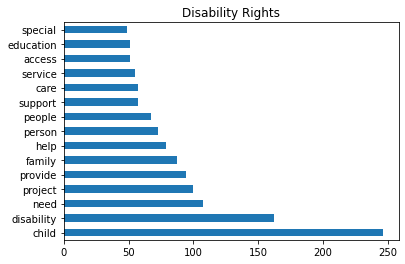

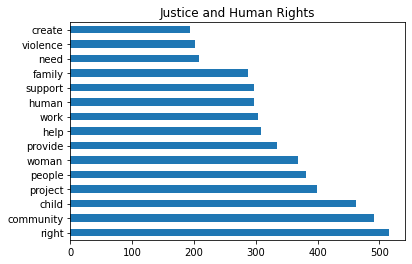

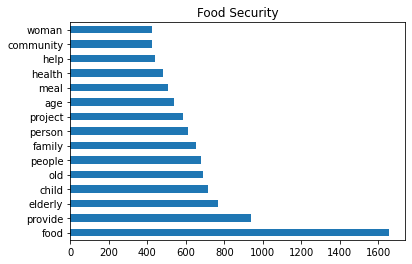

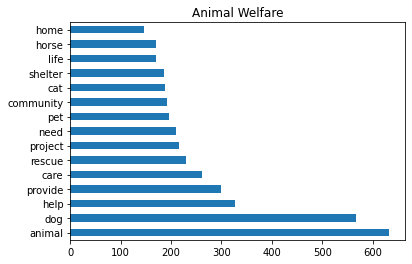

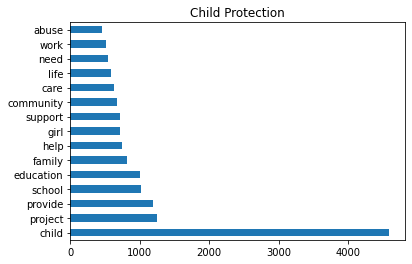

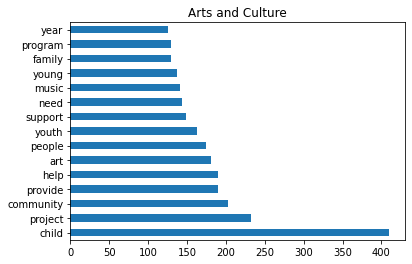

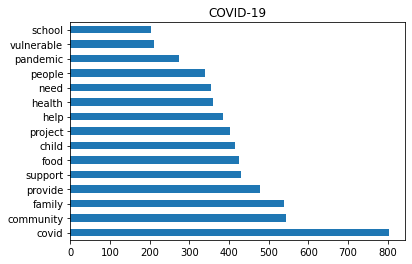

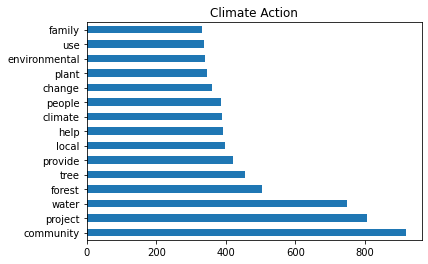

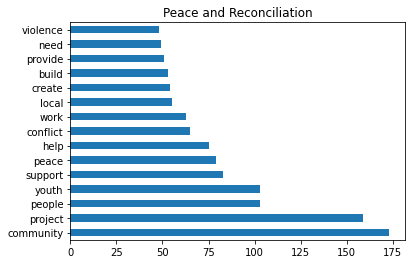

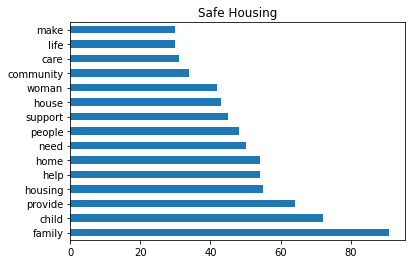

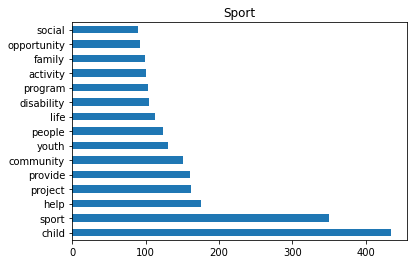

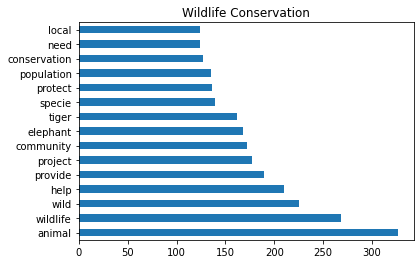

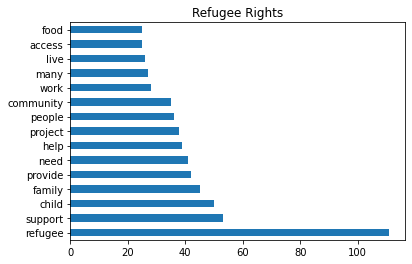

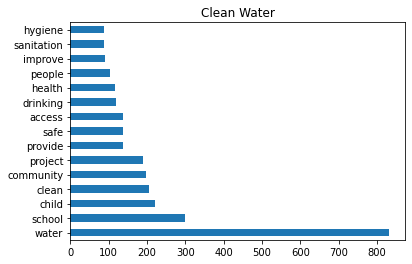

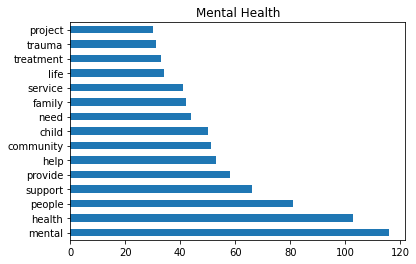

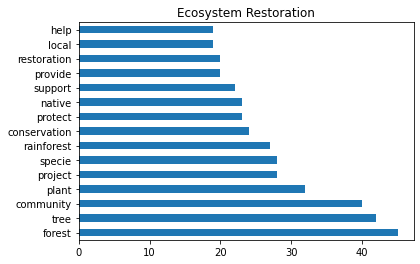

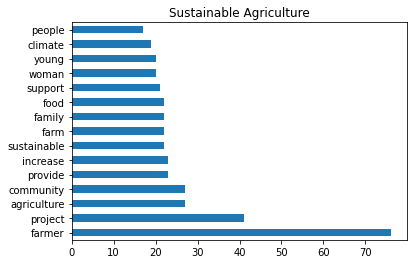

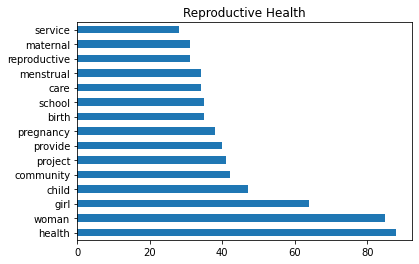

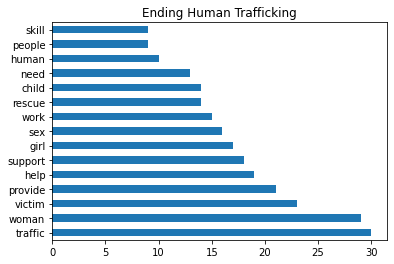

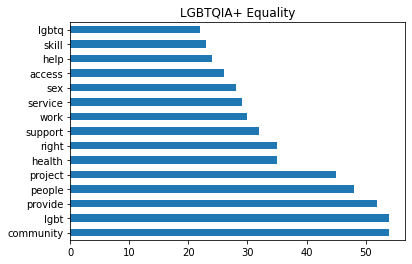

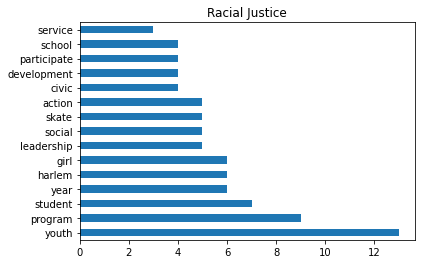

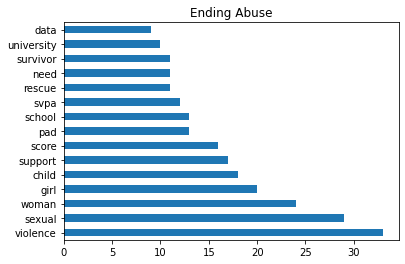

In [20]:
grouped_bw = bw.groupby('theme').sum()
themes = list(y.unique())
for theme in themes:
    theme_df = grouped_bw.loc[theme].sort_values(ascending = False)
    most_common_words = grouped_bw.loc[theme].sort_values(ascending = False).index[:15]
    fig, ax = plt.subplots()
    theme_df[most_common_words].plot.barh()
    ax.set_title(theme)
    plt.show()